# Project Titanic - Disaster

By: Denis Topallaj

## 0 Data Exploration

In [1]:
# importing dependencies

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

C:\Users\denis\AppData\Local\Temp\ipykernel_20296\2404491994.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [2]:
# read the csv file

df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
# Shape of dataset (rows, columns)

print(df.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [4]:
# display the first few rows and all columns

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Datatypes of dataset

print(df.info())
print(df_test.info())

# click on the 'in a text editor' link to see the full output

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [6]:
# More detailed information about each feature
print(df.describe())
print(df_test.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

C:\Users\denis\AppData\Local\Temp\ipykernel_20296\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

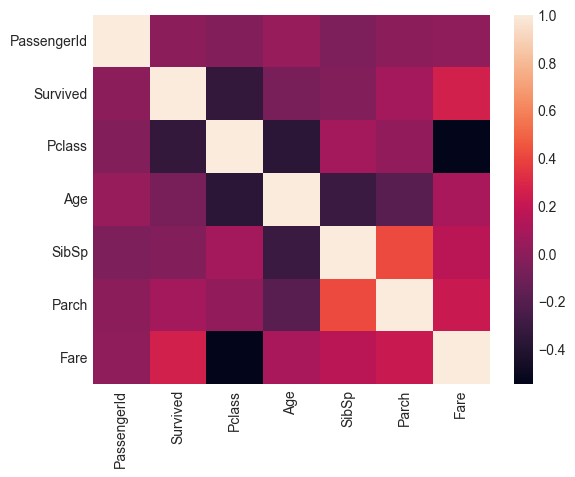

In [7]:
sns.heatmap(df.corr())

Not all features are being shown, this is because they are object features, so Name, Ticket, Embark, Cabin.

We are interested in how the "Survived" feature is negatively or positively correlated to other features. For example: "PassingerId" has a correlation of 0.0 which means that the persons survival rate did not get influenced by the "PassingerId".

We can see that the "Pclass" feature has a negative correlation with "Survived". Because the "Pclass" contains these kinds of data: 1 => 1st class, 2 => 2nd class and 3 => 3rd class. This means that the lower the number (so the higher the class), the higher the survival rate (closer to 1 instead of 0).

On the other hand we can see that "Fare" has a positive correlation with "Survived". This is because the higher the cost of the fare, the higher the status, spending, class ... and thus the higher the chance of survival.

"Sex" contains "M" & "F" data instead of zero's and one's. So because of this, we cannot make any conclusions about the correlation with "Survived".  

While exploring this data, I have come to these conclusions:

Features that can be dropped as they should not and/or cannot have an impact on if you survived or not:

	- PassengerId
	- Name
	- Ticket (the ticket number/code)

Features that need some clarification:

	- Parch => the number of children or parents you took with you on the ship
	- SibSp => the number of siblings or spouses you took with you on the ship

Features that need to be modified:

	- Sex => split into sex_male, sex_female with 0's and 1's
	- Embarked => split into port_C, port_Q, port_S
	- Pclass => split into 1st_class, 2nd_class, 3rd_class

Obviously a lot of data need to be filled in, we will use different methods for different sizes of missing data.

## 0.1 Dropping data

In [8]:
# PassengerId, Name and Ticket can be dropped, because they will not and cannot have an impact on the survival rate.

# PassengerId doesn't have any correlation with the survival rate, but I need this to hand in the datasets with the competition.

columns = ["PassengerId", "Name", "Ticket", "Cabin"]

for col in columns:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

columns.pop(0)

# also dropping the columns int the test data

for col in columns:
    if col in df_test.columns:
        df_test.drop(col, axis=1, inplace=True)

print("train", df.shape)
print("test", df_test.shape)

train (891, 8)
test (418, 8)


Nearly 78% of all 'Cabin' data is missing. There is no imputer than can even semi-accurately give right cabin data. This data is categorical anyway, so it won't be used while predicting anyway.   

## 0.2 Handling missing data

In [9]:
# These are the columns with missing data

print("train\n", df.isnull().sum()[df.isnull().sum() != 0])

print("\ntest\n", df_test.isnull().sum()[df_test.isnull().sum() != 0])

train
 Age         177
Embarked      2
dtype: int64

test
 Age     86
Fare     1
dtype: int64


### 0.2.1 Using mean for missing data

In [10]:
from sklearn.impute import SimpleImputer

df.copy()

df['Fare'] = df['Fare'].fillna(df['Fare'].dropna().median())
df['Age'] = df['Age'].fillna(df['Age'].dropna().median())

df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].dropna().median())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].dropna().median())


print("train\n", df.isnull().sum()[df.isnull().sum() != 0])
print("\ntest\n", df_test.isnull().sum()[df_test.isnull().sum() != 0])


train
 Embarked    2
dtype: int64

test
 Series([], dtype: int64)


### 0.2.2 Using most_frequent for missing data

In [11]:
# filling Embarked with 'S' the most frequent out of all of them

df['Embarked'] = df['Embarked'].fillna('S')

print("train\n", df.isnull().sum()[df.isnull().sum() != 0])
print("\ntest\n", df_test.isnull().sum()[df_test.isnull().sum() != 0])

train
 Series([], dtype: int64)

test
 Series([], dtype: int64)


## 0.3 Feature engineering

### 0.3.1 Modifying the Pclass column

In [12]:
if 'Pclass' in df.columns:
	if '1st_class' not in df.columns:
		df['1st_class'] = 0

	if '2nd_class' not in df.columns:
		df['2nd_class'] = 0

	if '3rd_class' not in df.columns:
		df['3rd_class'] = 0

	# Set the value of the new columns based on the 'Pclass' column
	df.loc[df['Pclass'] == 1, '1st_class'] = 1
	df.loc[df['Pclass'] == 2, '2nd_class'] = 1
	df.loc[df['Pclass'] == 3, '3rd_class'] = 1

	# Drop the original 'Pclass' column
	df = df.drop('Pclass', axis=1)

# also for the test set

if 'Pclass' in df_test.columns:
	if '1st_class' not in df_test.columns:
		df_test['1st_class'] = 0

	if '2nd_class' not in df_test.columns:
		df_test['2nd_class'] = 0

	if '3rd_class' not in df_test.columns:
		df_test['3rd_class'] = 0

	# Set the value of the new columns based on the 'Pclass' column
	df_test.loc[df_test['Pclass'] == 1, '1st_class'] = 1
	df_test.loc[df_test['Pclass'] == 2, '2nd_class'] = 1
	df_test.loc[df_test['Pclass'] == 3, '3rd_class'] = 1

	# Drop the original 'Pclass' column
	df_test = df_test.drop('Pclass', axis=1)


df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,1st_class,2nd_class,3rd_class
0,0,male,22.0,1,0,7.2500,S,0,0,1
1,1,female,38.0,1,0,71.2833,C,1,0,0
2,1,female,26.0,0,0,7.9250,S,0,0,1
3,1,female,35.0,1,0,53.1000,S,1,0,0
4,0,male,35.0,0,0,8.0500,S,0,0,1


### 0.3.2 Modifying the Embarked column

In [13]:
# Create new columns with default value 0
if 'Embarked' in df.columns:
	if 'port_C' not in df.columns:
		df['port_C'] = 0

	if 'port_Q' not in df.columns:
		df['port_Q'] = 0

	if 'port_S' not in df.columns:
		df['port_S'] = 0

# Set the value of the new columns based on the 'Embarked' column
df.loc[df['Embarked'] == 'C', 'port_C'] = 1
df.loc[df['Embarked'] == 'Q', 'port_Q'] = 1
df.loc[df['Embarked'] == 'S', 'port_S'] = 1

# Drop the original 'Embarked' column
df = df.drop('Embarked', axis=1)


# also for the test set
# Create new columns with default value 0
if 'Embarked' in df_test.columns:
	if 'port_C' not in df_test.columns:
		df_test['port_C'] = 0

	if 'port_Q' not in df_test.columns:
		df_test['port_Q'] = 0

	if 'port_S' not in df_test.columns:
		df_test['port_S'] = 0

# Set the value of the new columns based on the 'Embarked' column
df_test.loc[df_test['Embarked'] == 'C', 'port_C'] = 1
df_test.loc[df_test['Embarked'] == 'Q', 'port_Q'] = 1
df_test.loc[df_test['Embarked'] == 'S', 'port_S'] = 1

# Drop the original 'Embarked' column
df_test = df_test.drop('Embarked', axis=1)

df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,1st_class,2nd_class,3rd_class,port_C,port_Q,port_S
0,0,male,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,female,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,female,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,female,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,male,35.0,0,0,8.0500,0,0,1,0,0,1


### 0.3.3 Modifying the 'Sex' column

In [14]:
# Create new columns with default value 0
if 'Sex' in df.columns:
	if 'sex_male' not in df.columns:
		df['sex_male'] = 0

	if 'sex_female' not in df.columns:
		df['sex_female'] = 0

# Set the value of the new columns based on the 'Sex' column
df.loc[df['Sex'] == 'male', 'sex_male'] = 1
df.loc[df['Sex'] == 'female', 'sex_female'] = 1

# Drop the original 'Sex' column
df = df.drop('Sex', axis=1)


# also for the test set
# Create new columns with default value 0
if 'Sex' in df_test.columns:
	if 'sex_male' not in df_test.columns:
		df_test['sex_male'] = 0

	if 'sex_female' not in df_test.columns:
		df_test['sex_female'] = 0

# Set the value of the new columns based on the 'Sex' column
df_test.loc[df_test['Sex'] == 'male', 'sex_male'] = 1
df_test.loc[df_test['Sex'] == 'female', 'sex_female'] = 1

# Drop the original 'Sex' column
df_test = df_test.drop('Sex', axis=1)

df.head()

,Survived,Age,SibSp,Parch,Fare,1st_class,2nd_class,3rd_class,port_C,port_Q,port_S,sex_male,sex_female
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,1,0
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,1
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,1,0


### 0.3.4 Combining SibSp and Parch to FamilyAmount 

In [15]:
datasets = [df, df_test]

for dataset in datasets:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

# +1 is because you can't go without yourself

In [16]:
df.info()

# normally there should be something done about the datatypes and how int64 is too much for a binary feature. The reason we don't do that here is, because when storing to excel it don't transfer the datatypes correctly.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   1st_class   891 non-null    int64  
 6   2nd_class   891 non-null    int64  
 7   3rd_class   891 non-null    int64  
 8   port_C      891 non-null    int64  
 9   port_Q      891 non-null    int64  
 10  port_S      891 non-null    int64  
 11  sex_male    891 non-null    int64  
 12  sex_female  891 non-null    int64  
 13  FamilySize  891 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 97.6 KB


c:\Users\denis\.virtualenvs\project-ut2L16O1\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\denis\.virtualenvs\project-ut2L16O1\Lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\denis\.virtualenvs\project-ut2L16O1\Lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\denis\.virtualenvs\project-ut2L16O1\Lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update y

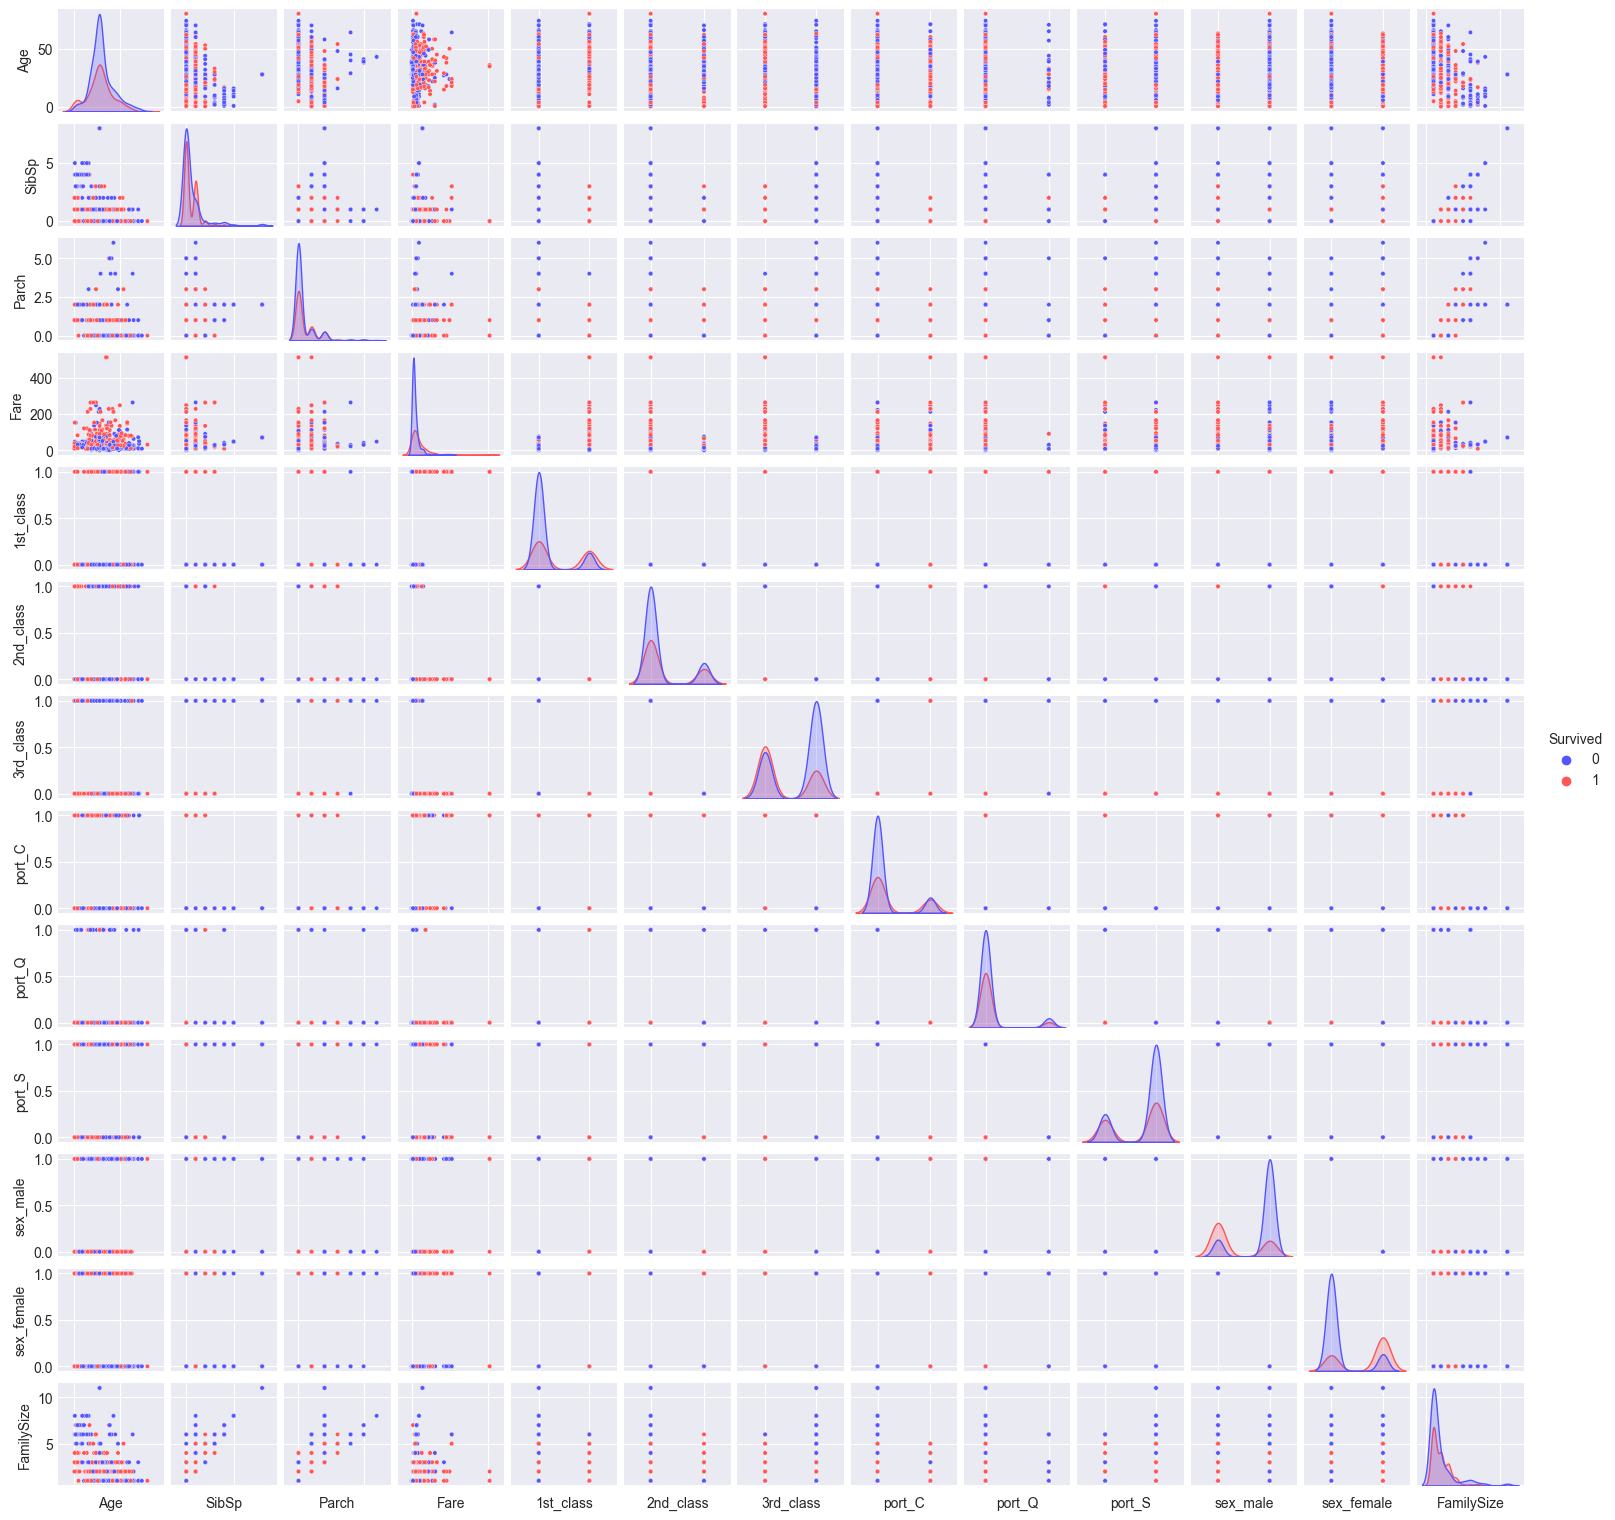

In [17]:
g = sns.pairplot(data=df, hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

## 0.4 Storing cleaned datasets

In [18]:
# the cleaned csv will now be in the file train_cleaned and will be used for the rest of the calculations

df.to_csv('train_cleaned.csv', index=False)
df_test.to_csv('test_cleaned.csv', index=False)